# Car Insurance Fraud Claim Detection

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from mlxtend.plotting import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, accuracy_score, recall_score, roc_curve, precision_recall_curve, auc
from sklearn.tree import DecisionTreeClassifier
import warnings

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving insurance_claims.csv to insurance_claims (1).csv


In [ ]:
# Load CSV file into a DataFrame
df = pd.read_csv('insurance_claims.csv')


In [ ]:
df.head()


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [ ]:
df.shape

(1000, 40)

In [ ]:
# Outputs the number of missing values
values = pd.DataFrame(df.isnull().sum(), columns=['nulls'])

# Displays the percentage of missing values within the dataset
values["%_of_nulls"]=round(df.isnull().sum()/len(df)*100)
values = values.sort_values(by='%_of_nulls', ascending=False)
values

,nulls,%_of_nulls
_c39,1000,100.0
authorities_contacted,91,9.0
fraud_reported,0,0.0
auto_year,0,0.0
incident_state,0,0.0
incident_city,0,0.0
incident_location,0,0.0
incident_hour_of_the_day,0,0.0
number_of_vehicles_involved,0,0.0
property_damage,0,0.0


In [ ]:
df['authorities_contacted'] = df['authorities_contacted'].fillna(df['authorities_contacted'].mode()[0])


In [ ]:
# Outputs the number of missing values
values = pd.DataFrame(df.isnull().sum(), columns=['nulls'])

# Displays the percentage of missing values within the dataset
values["%_of_nulls"]=round(df.isnull().sum()/len(df)*100)
values = values.sort_values(by='%_of_nulls', ascending=False)
values

,nulls,%_of_nulls
_c39,1000,100.0
age,0,0.0
incident_state,0,0.0
incident_city,0,0.0
incident_location,0,0.0
incident_hour_of_the_day,0,0.0
number_of_vehicles_involved,0,0.0
property_damage,0,0.0
bodily_injuries,0,0.0
witnesses,0,0.0


In [ ]:
df.head()


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


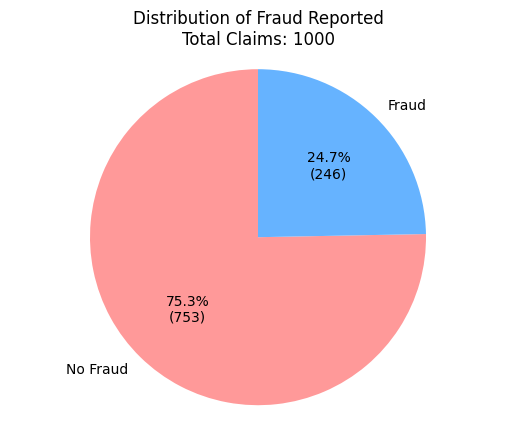

In [ ]:
import matplotlib.pyplot as plt

# Replace 'Y' with 'Fraud' and 'N' with 'No Fraud' in the 'fraud_reported' column
df['fraud_reported'] = df['fraud_reported'].replace({'Y': 'Fraud', 'N': 'No Fraud'})

# Calculate the counts and percentages for each category
fraud_counts = df['fraud_reported'].value_counts()
total_claims = fraud_counts.sum()
fraud_percentages = (fraud_counts / total_claims) * 100

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(fraud_counts,
       labels=fraud_counts.index,
       autopct=lambda p: f'{p:.1f}%\n({int(p/100.*total_claims)})',
       colors=['#ff9999', '#66b3ff'],  # Lighter Red for Fraud, Lighter Blue for No Fraud
       startangle=90)

# Add the total number of claims to the title
plt.title(f'Distribution of Fraud Reported\nTotal Claims: {total_claims}')

# Ensure the pie chart is drawn as a circle
ax.axis('equal')

# Show the plot
plt.show()


<ipython-input-31-56096b53287e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_claims, x='fraud_reported', y='total_claim_amount', palette={'Fraud': 'red', 'No Fraud': 'blue'})


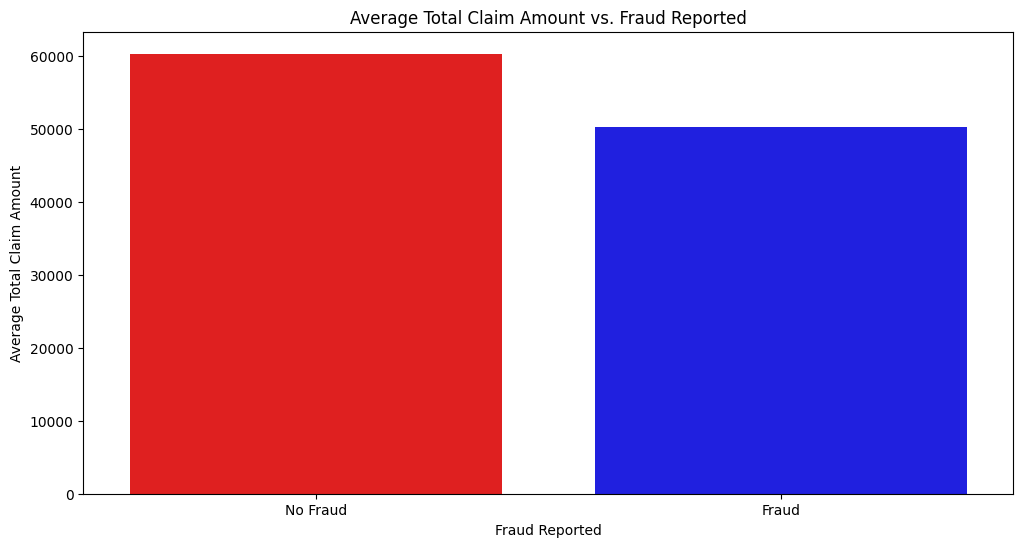

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 'Y' with 'Fraud' and 'N' with 'No Fraud' in the 'fraud_reported' column
df['fraud_reported'] = df['fraud_reported'].replace({'Y': 'Fraud', 'N': 'No Fraud'})

# Calculate the average total claim amount for each category
average_claims = df.groupby('fraud_reported')['total_claim_amount'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=average_claims, x='fraud_reported', y='total_claim_amount', palette={'Fraud': 'red', 'No Fraud': 'blue'})
plt.title('Average Total Claim Amount vs. Fraud Reported')
plt.xlabel('Fraud Reported')
plt.ylabel('Average Total Claim Amount')
plt.xticks([0, 1], ['No Fraud', 'Fraud'])
plt.show()


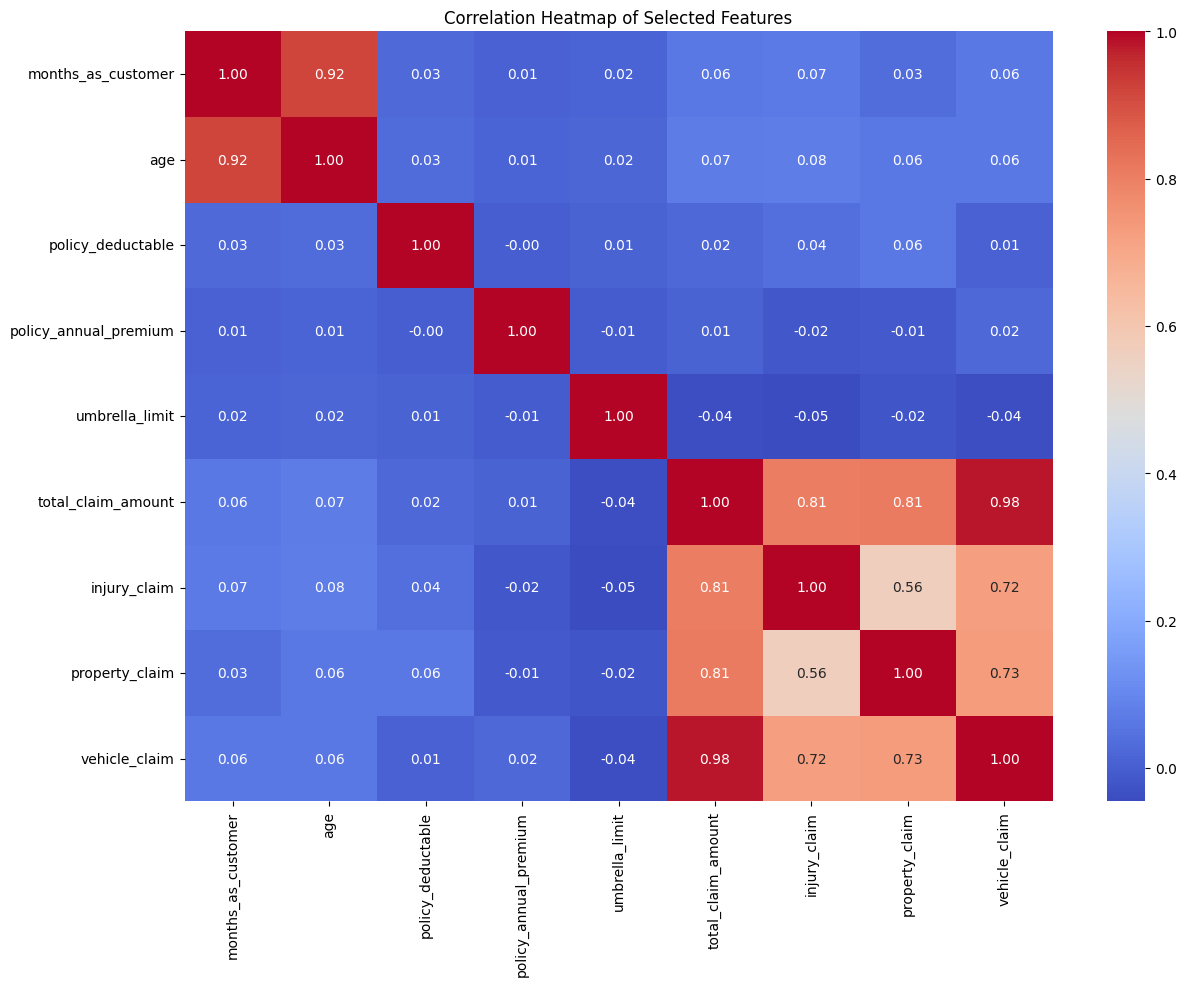

In [ ]:
# Compute correlation matrix for selected features
selected_features = ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']
correlation_matrix = df[selected_features].corr()

# Plot the correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Selected Features')
plt.show()


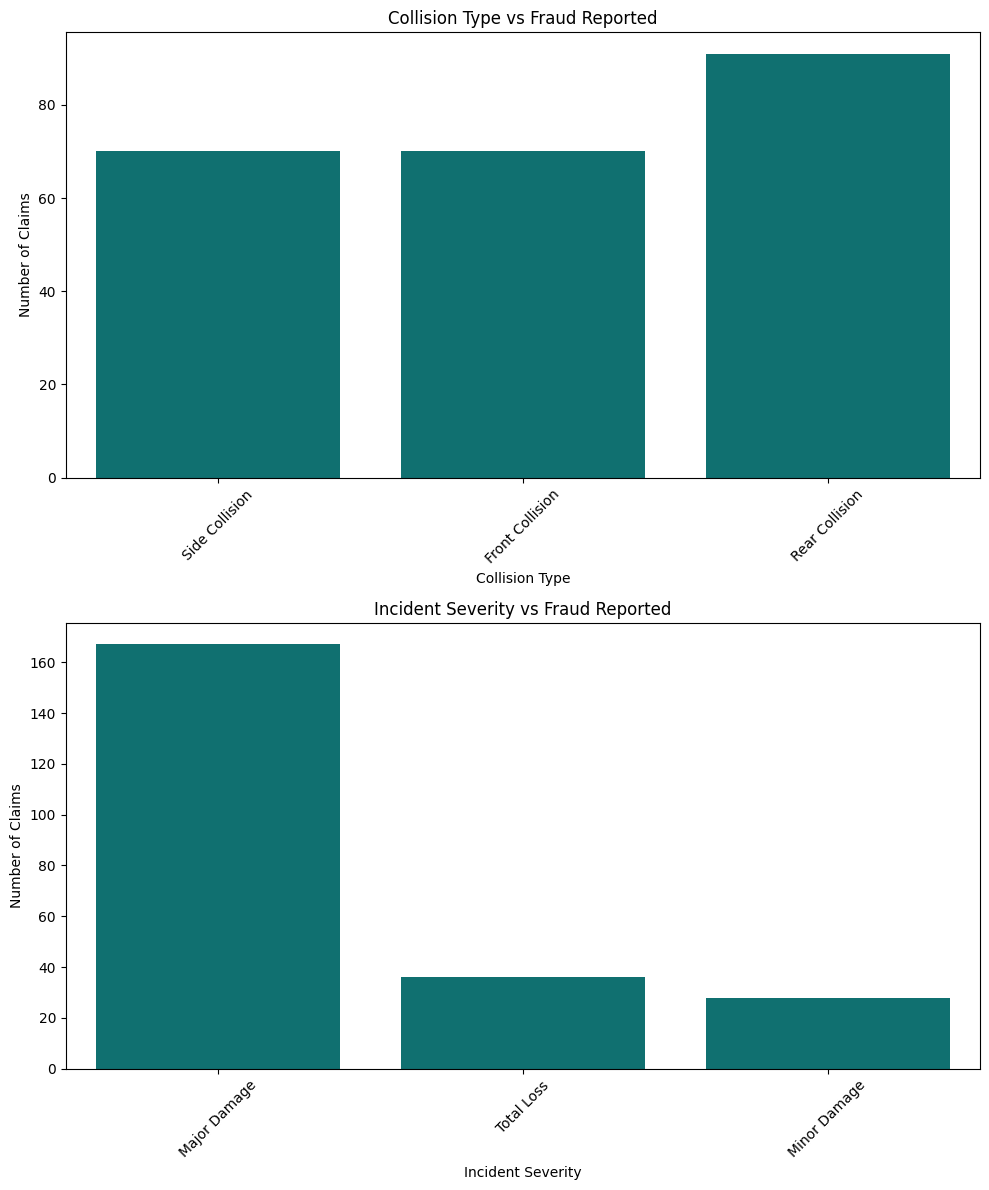

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your dataframe with columns 'collision_type', 'incident_severity', 'age_group', 'witnesses', and 'fraud_reported'

# Replace 'Y' with 'Fraud' and 'N' with 'No Fraud' in the 'fraud_reported' column
df['fraud_reported'] = df['fraud_reported'].replace({'Y': 'Fraud', 'N': 'No Fraud'})

# Filter out rows where collision_type contains '?'
df = df[~df['collision_type'].str.contains('\?')]

# Plotting the adjusted graphs
fig, axes = plt.subplots(2, 1, figsize=(10, 12))  # 2 rows, 1 column layout

# Filter the DataFrame to include only rows where fraud was reported
df_fraud = df[df['fraud_reported'] == 'Fraud']

# Collision Type vs Fraud Reported
sns.countplot(data=df_fraud, x='collision_type', ax=axes[0], color='teal')
axes[0].set_title('Collision Type vs Fraud Reported')
axes[0].set_xlabel('Collision Type')
axes[0].set_ylabel('Number of Claims')
axes[0].tick_params(axis='x', rotation=45)

# Incident Severity vs Fraud Reported
sns.countplot(data=df_fraud, x='incident_severity', ax=axes[1], color='teal')
axes[1].set_title('Incident Severity vs Fraud Reported')
axes[1].set_xlabel('Incident Severity')
axes[1].set_ylabel('Number of Claims')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


<ipython-input-34-071779ee6fca>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_per_occupation.values, y=fraud_per_occupation.index, palette='Paired')


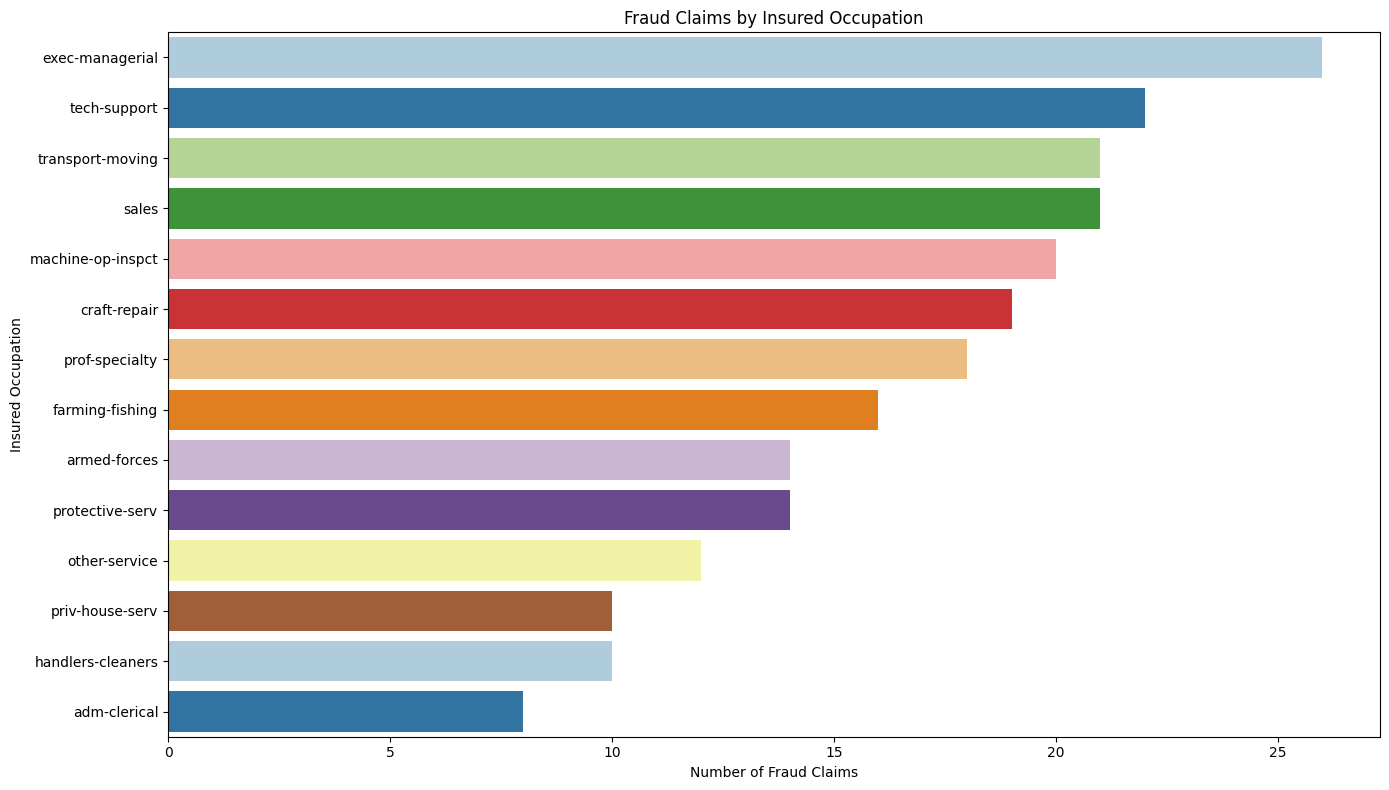

In [ ]:

# Replace 'Y' with 'Fraud' and 'N' with 'No Fraud' in the 'fraud_reported' column (if not already done)
df['fraud_reported'] = df['fraud_reported'].replace({'Y': 'Fraud', 'N': 'No Fraud'})

# Filter the DataFrame to include only rows where fraud was reported
df_fraud = df[df['fraud_reported'] == 'Fraud']

# Count fraud claims by insured occupation
fraud_per_occupation = df_fraud['insured_occupation'].value_counts()

# Plotting the bar graph with improved readability
plt.figure(figsize=(14, 8))  # Increase figure size
sns.barplot(x=fraud_per_occupation.values, y=fraud_per_occupation.index, palette='Paired')
plt.title('Fraud Claims by Insured Occupation')
plt.xlabel('Number of Fraud Claims')
plt.ylabel('Insured Occupation')
plt.tight_layout()
plt.show()


<ipython-input-35-eb7080723e33>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_per_hobby.values, y=fraud_per_hobby.index, palette='husl')


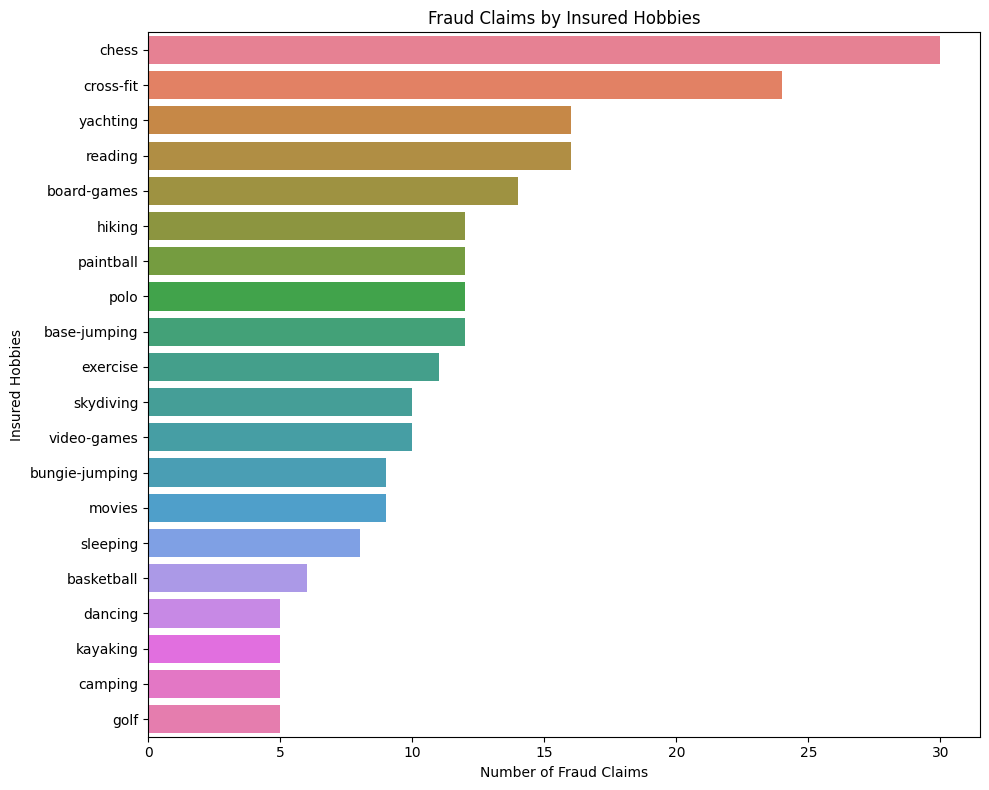

In [ ]:

# Replace 'Y' with 'Fraud' and 'N' with 'No Fraud' in the 'fraud_reported' column (if not already done)
df['fraud_reported'] = df['fraud_reported'].replace({'Y': 'Fraud', 'N': 'No Fraud'})

# Filter the DataFrame to include only rows where fraud was reported
df_fraud = df[df['fraud_reported'] == 'Fraud']

# Count fraud claims by insured hobbies
fraud_per_hobby = df_fraud['insured_hobbies'].value_counts()

# Plotting the horizontal bar graph
plt.figure(figsize=(10, 8))
sns.barplot(x=fraud_per_hobby.values, y=fraud_per_hobby.index, palette='husl')
plt.title('Fraud Claims by Insured Hobbies')
plt.xlabel('Number of Fraud Claims')
plt.ylabel('Insured Hobbies')
plt.tight_layout()
plt.show()


<ipython-input-36-2429f1315be5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_per_police_report.index, y=fraud_per_police_report.values, palette='Set2')


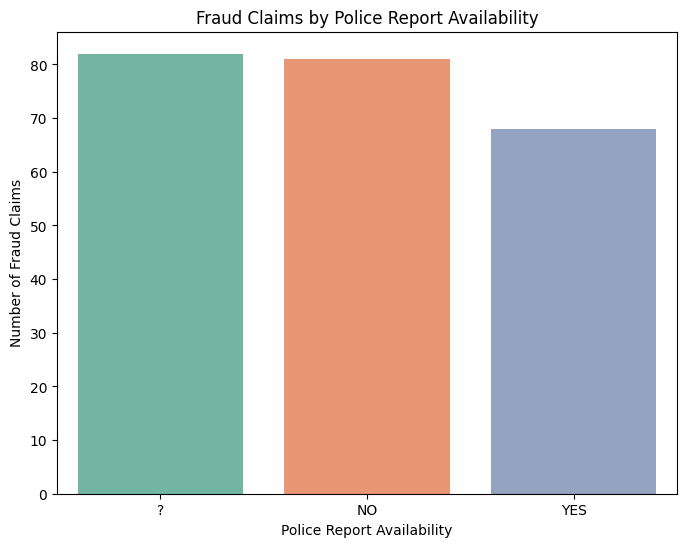

In [ ]:
# Count fraud claims by police report availability
fraud_per_police_report = df_fraud['police_report_available'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(8, 6))
sns.barplot(x=fraud_per_police_report.index, y=fraud_per_police_report.values, palette='Set2')
plt.title('Fraud Claims by Police Report Availability')
plt.xlabel('Police Report Availability')
plt.ylabel('Number of Fraud Claims')
plt.show()


<ipython-input-17-4f754ed94f98>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_fraud, y=column, order=df_fraud[column].value_counts().index, palette='viridis')


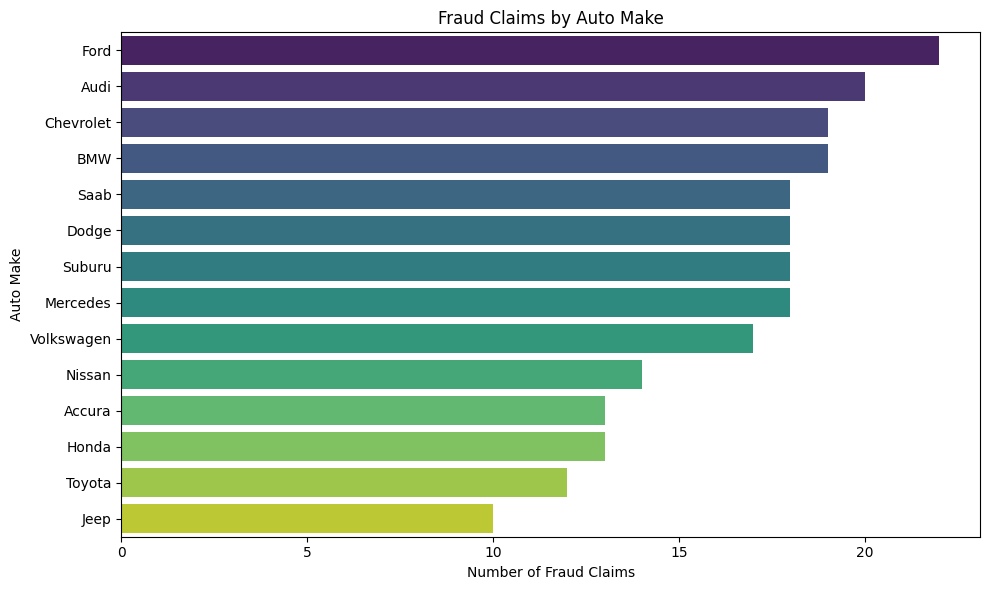

<ipython-input-17-4f754ed94f98>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_fraud, y=column, order=df_fraud[column].value_counts().index, palette='viridis')


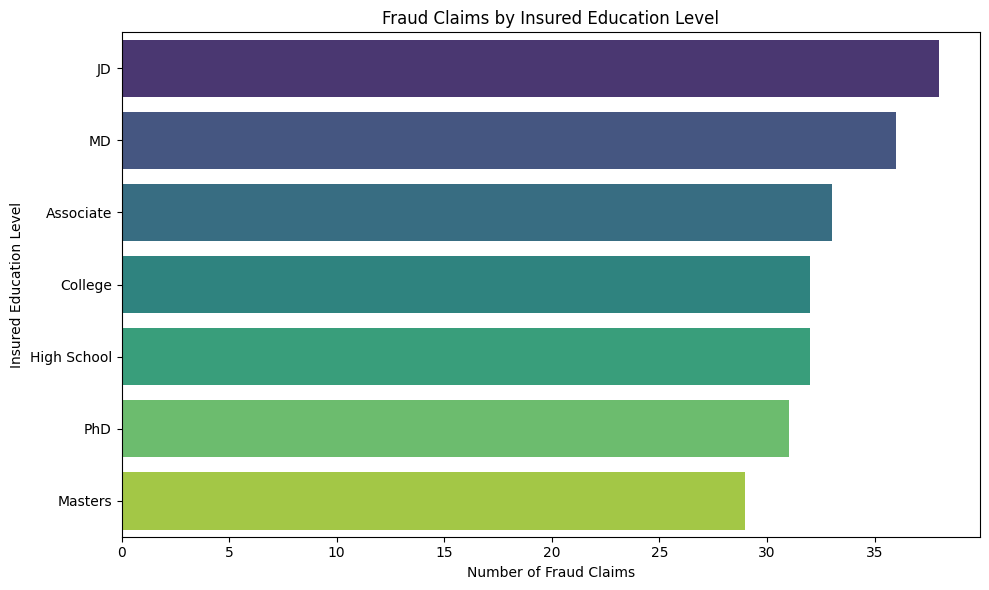

<ipython-input-17-4f754ed94f98>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_fraud, y=column, order=df_fraud[column].value_counts().index, palette='viridis')


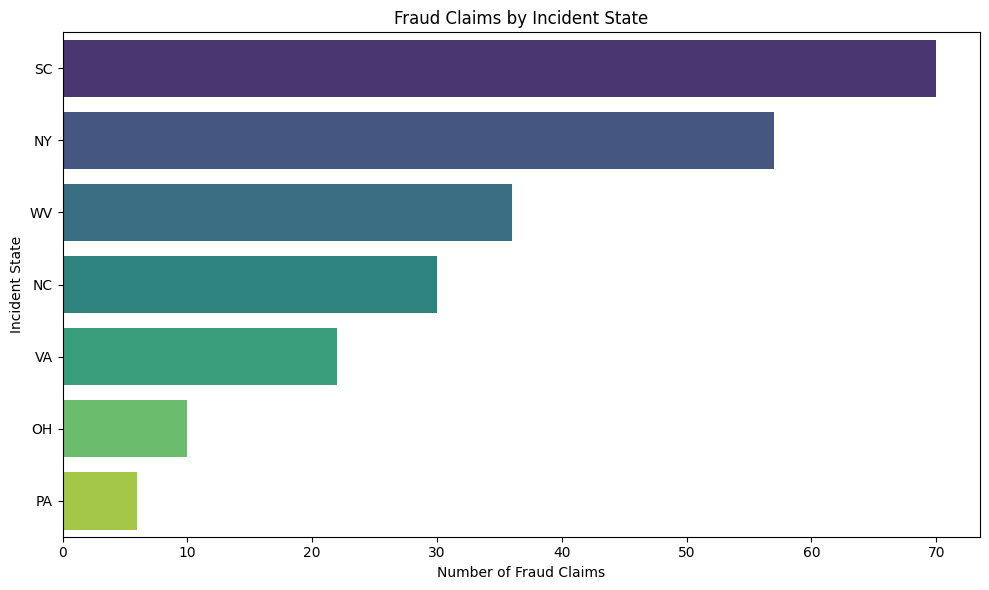

<ipython-input-17-4f754ed94f98>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_fraud, y=column, order=df_fraud[column].value_counts().index, palette='viridis')


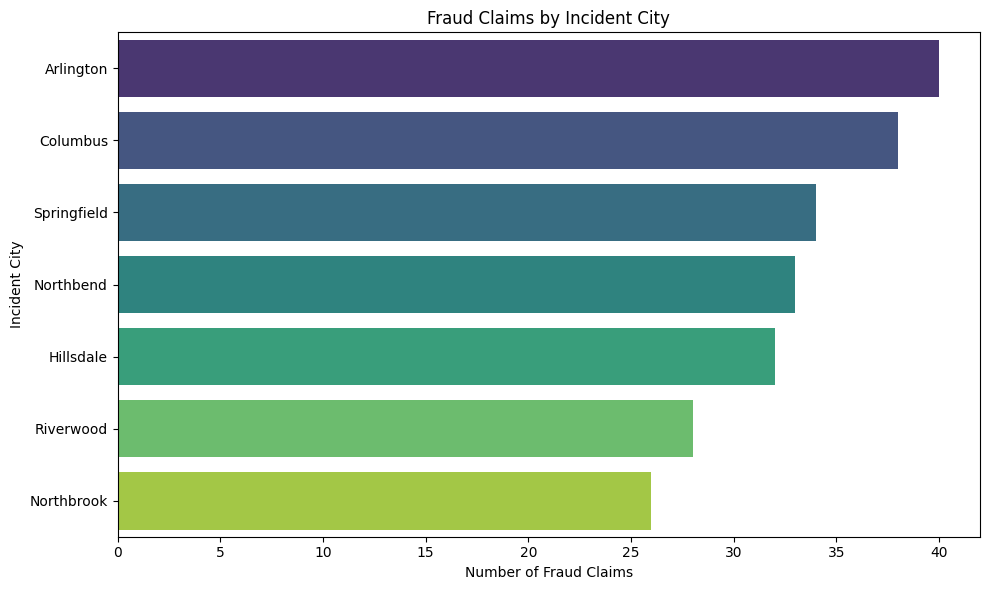

<ipython-input-17-4f754ed94f98>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_fraud, y=column, order=df_fraud[column].value_counts().index, palette='viridis')


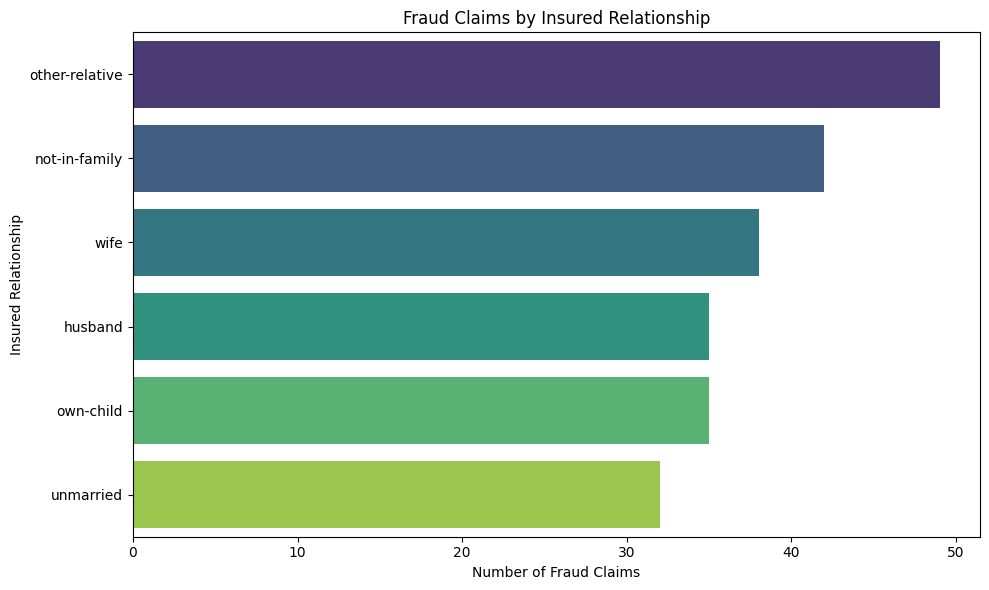

<ipython-input-17-4f754ed94f98>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_fraud, y=column, order=df_fraud[column].value_counts().index, palette='viridis')


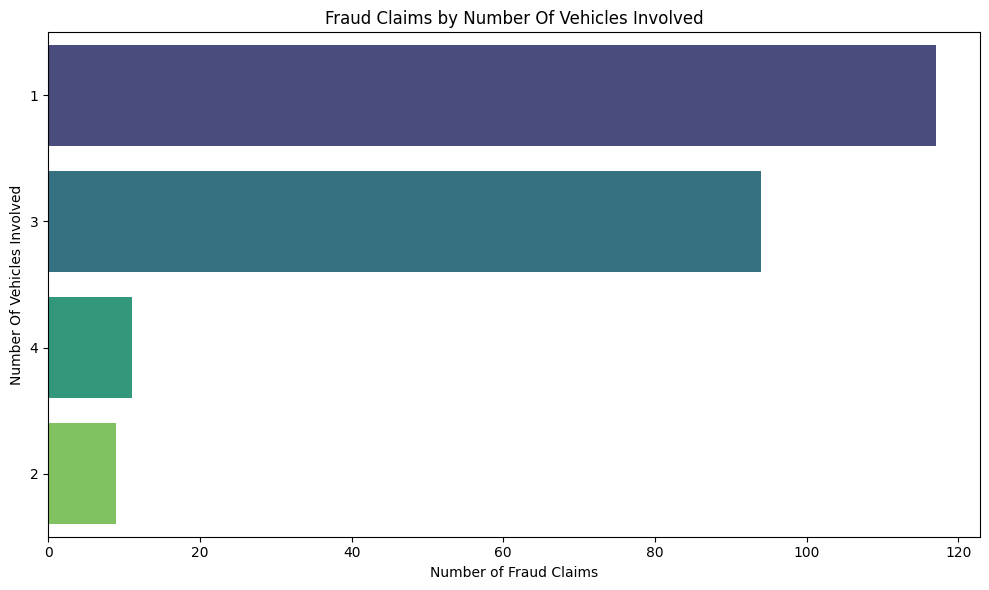

In [ ]:


# Replace 'Y' with 'Fraud' and 'N' with 'No Fraud' in the 'fraud_reported' column (if not already done)
df['fraud_reported'] = df['fraud_reported'].replace({'Y': 'Fraud', 'N': 'No Fraud'})

# Filter the DataFrame to include only rows where fraud was reported
df_fraud = df[df['fraud_reported'] == 'Fraud']

# Columns to plot
columns_to_plot = [

    'auto_make',
    'insured_education_level', 'incident_state', 'incident_city',
    'insured_relationship', 'number_of_vehicles_involved',

]

# Plot each column
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_fraud, y=column, order=df_fraud[column].value_counts().index, palette='viridis')
    plt.title(f'Fraud Claims by {column.replace("_", " ").title()}')
    plt.xlabel('Number of Fraud Claims')
    plt.ylabel(column.replace("_", " ").title())
    plt.tight_layout()
    plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 822 entries, 0 to 998
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           822 non-null    int64  
 1   age                          822 non-null    int64  
 2   policy_number                822 non-null    int64  
 3   policy_bind_date             822 non-null    object 
 4   policy_state                 822 non-null    object 
 5   policy_csl                   822 non-null    object 
 6   policy_deductable            822 non-null    int64  
 7   policy_annual_premium        822 non-null    float64
 8   umbrella_limit               822 non-null    int64  
 9   insured_zip                  822 non-null    int64  
 10  insured_sex                  822 non-null    object 
 11  insured_education_level      822 non-null    object 
 12  insured_occupation           822 non-null    object 
 13  insured_hobbies          

In [ ]:
# Get the number of unique values in each column and sort from biggest to smallest
unique_counts_sorted = df.nunique().sort_values(ascending=False)

print(unique_counts_sorted)


policy_number                  822
incident_location              822
insured_zip                    820
policy_annual_premium          817
policy_bind_date               787
total_claim_amount             647
vehicle_claim                  624
injury_claim                   559
property_claim                 544
months_as_customer             372
capital-loss                   313
capital-gains                  302
incident_date                   60
age                             46
auto_model                      39
incident_hour_of_the_day        24
auto_year                       21
insured_hobbies                 20
insured_occupation              14
auto_make                       14
umbrella_limit                  11
insured_education_level          7
incident_state                   7
incident_city                    7
insured_relationship             6
authorities_contacted            4
number_of_vehicles_involved      4
witnesses                        4
police_report_availa

In [ ]:
np.random.seed(1)

warnings.filterwarnings("ignore")

data = pd.read_csv("insurance_claims.csv")

drop_columns = ["_c39", "auto_model", "policy_bind_date", "policy_state", "incident_date",
               "incident_state", "incident_city", "incident_location", "policy_csl"]

data = data.drop(drop_columns, axis=1)

new_response = []
response = data.iloc[:, -1]
for i in range(len(response)):
    new_response.append(1 if response[i]=='Y' else 0)

data["fraud_reported"] = pd.Series(new_response)

We will be dropping insignificant features like:

- policy_bind_date
- policy_state
- incident_date
- auto_model
- _c39
- policy_csl

# Performing initial EDA.

- We can see that male and female are almost in the same proportion.

In [ ]:
predictors = data.iloc[:,:-1]
response = data.iloc[:, -1]

# new_response = []

# for i in range(len(response)):
#     new_response.append(1 if response[i]=='Y' else 0)

# response = pd.Series(new_response)

categorical_data = predictors.select_dtypes(exclude="number")
categorical_predictors = categorical_data.columns

predictors = predictors.drop(categorical_predictors, axis=1)

- Since most of our data is categorical we have two options, assign a integer value to each level of the categorical variable or one-hot encode these categorical variables.

- One major drawback of assigning integer value to each level is that it adds additional charecteristics to the data. For example let's say we have a variable with levels as BMW, Mazda, Mercedes and Subaru and we are assigning 0, 1, 2 and 3 integer values to them respectively. When we apply any model the model considers these values as continuous and assumes an unwanted hierarchy like BMQ < Mazda < Mercedes < Subaru, which might not be the case at all.

- Hence we go with one hot encoding of categorical variables.

In [ ]:
one_hot_data = pd.get_dummies(categorical_data)
predictors = predictors.join(one_hot_data)

predictor_columns = predictors.columns
response_columns = response

predictors_train, predictors_test, response_train, response_test = train_test_split(predictors,
                                                                                    response,
                                                                                    test_size=0.3)

- Since we have class imbalance in the data, we perform minority class oversampling using SMOTE, Synthetic Minority Oversampling Technique, which uses K nearest neighbors to come up with new samples in the minority class.

In [ ]:
sm = SMOTE(random_state=24)
predictors, response = sm.fit_resample(predictors_train, response_train)

predictors_train = pd.DataFrame(predictors, columns=predictor_columns)
response_train = pd.Series(response)

model_preds = {}

# Logistic Regression

*****************************************
Results on testing data:
*****************************************
Accuracy = 0.56
Precision = 0.6125
Recall = 0.32666666666666666

AUC value = 0.5599999999999999


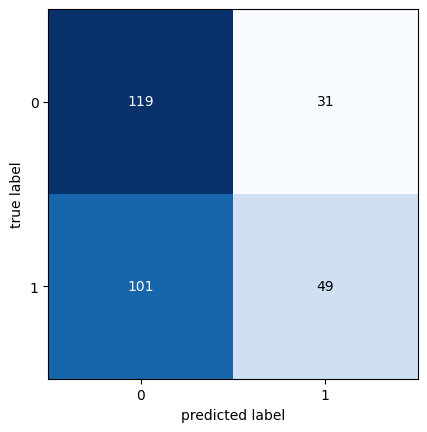

In [ ]:
model = LogisticRegression()
model.fit(predictors_train, response_train)
predictions_test = model.predict(predictors_test)
predictions_train = model.predict(predictors_train)

conf_matrix = confusion_matrix(predictions_test, response_test)
plot_confusion_matrix(conf_matrix)

precision = precision_score(predictions_test, response_test)
recall = recall_score(predictions_test, response_test)

print("*****************************************")
print("Results on testing data:")
print("*****************************************")
print("Accuracy = "+str(accuracy_score(predictions_test, response_test)))
print("Precision = "+str(precision))
print("Recall = "+str(recall))

tpr, fpr, threshold = roc_curve(predictions_test, response_test, pos_label=1)
model_preds["Logistic Regression"] = [tpr, fpr]
print()
print("AUC value = "+str(auc(tpr, fpr)))


# K Nearest Neighbors

*****************************************
Results on testing data:
*****************************************
Accuracy = 0.54
Precision = 0.45
Recall = 0.27692307692307694

AUC value = 0.5090497737556561


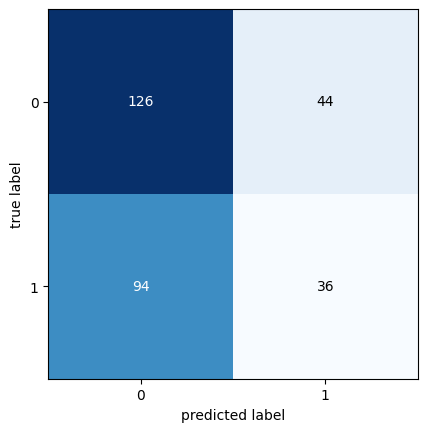

In [ ]:
knn = KNeighborsClassifier()
knn.fit(predictors_train, response_train)

predictions_train = knn.predict(predictors_train)
predictions_test = knn.predict(predictors_test)

conf_matrix = confusion_matrix(predictions_test, response_test)
plot_confusion_matrix(conf_matrix)

precision = precision_score(predictions_test, response_test)
recall = recall_score(predictions_test, response_test)

print("*****************************************")
print("Results on testing data:")
print("*****************************************")
print("Accuracy = "+str(accuracy_score(predictions_test, response_test)))
print("Precision = "+str(precision))
print("Recall = "+str(recall))

tpr, fpr, threshold = roc_curve(predictions_test, response_test, pos_label=1)
model_preds["K Nearest Neighbor"] = [tpr, fpr]
print()
print("AUC value = "+str(auc(tpr, fpr)))

# Decision Trees

*****************************************
Results on testing data:
*****************************************
Accuracy = 0.875
Precision = 0.9041916167664671
Recall = 0.8628571428571429

AUC value = 0.8762561576354679


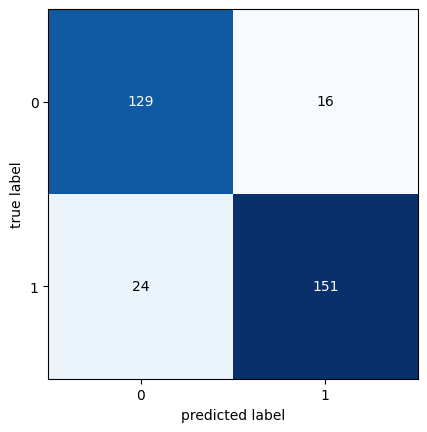

In [ ]:
## Since it has a lot of categorical variables and the dataset is also not huge we
## will use decision trees to get more accuracy.

predictors_train, predictors_test, response_train, response_test = train_test_split(predictors,response,test_size=0.3)

tree = DecisionTreeClassifier()
tree.fit(predictors_train, response_train)
predictions_test = tree.predict(predictors_test)
predictions_train = tree.predict(predictors_train)

conf_matrix = confusion_matrix(predictions_test, response_test)
plot_confusion_matrix(conf_matrix)

precision = precision_score(predictions_test, response_test)
recall = recall_score(predictions_test, response_test)

print("*****************************************")
print("Results on testing data:")
print("*****************************************")
print("Accuracy = "+str(accuracy_score(predictions_test, response_test)))
print("Precision = "+str(precision))
print("Recall = "+str(recall))

tpr, fpr, threshold = roc_curve(predictions_test, response_test, pos_label=1)
model_preds["Decision Tree"] = [tpr, fpr]
print()
print("AUC value = "+str(auc(tpr, fpr)))

# Random Forest Classifier

*****************************************
Results on testing data:
*****************************************
Accuracy = 0.91875
Precision = 0.9461077844311377
Recall = 0.9028571428571428

AUC value = 0.9203940886699508


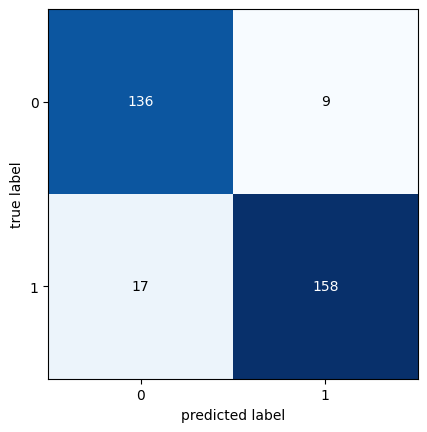

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(predictors_train, response_train)
predictions_test = random_forest.predict(predictors_test)
predictions_train = random_forest.predict(predictors_train)

conf_matrix = confusion_matrix(predictions_test, response_test)
plot_confusion_matrix(conf_matrix)

precision = precision_score(predictions_test, response_test)
recall = recall_score(predictions_test, response_test)

print("*****************************************")
print("Results on testing data:")
print("*****************************************")
print("Accuracy = "+str(accuracy_score(predictions_test, response_test)))
print("Precision = "+str(precision))
print("Recall = "+str(recall))

tpr, fpr, threshold = roc_curve(predictions_test, response_test, pos_label=1)
model_preds["Random Forest"] = [tpr, fpr]
print()
print("AUC value = "+str(auc(tpr, fpr)))

# Linear Discriminant Analysis

*****************************************
Results on testing data:
*****************************************
Accuracy = 0.89375
Precision = 0.8682634730538922
Recall = 0.9235668789808917

AUC value = 0.8942987769137587


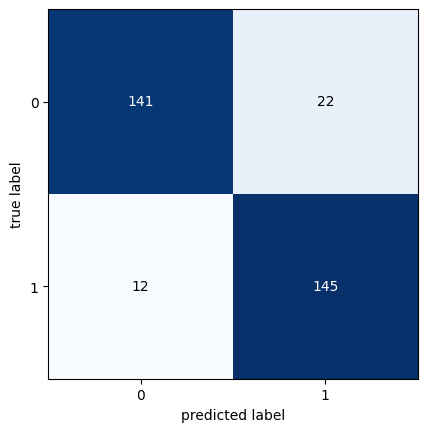

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(predictors_train, response_train)
predictions_test = lda.predict(predictors_test)
predictions_train = lda.predict(predictors_train)

conf_matrix = confusion_matrix(predictions_test, response_test)
plot_confusion_matrix(conf_matrix)

precision = precision_score(predictions_test, response_test)
recall = recall_score(predictions_test, response_test)

print("*****************************************")
print("Results on testing data:")
print("*****************************************")
print("Accuracy = "+str(accuracy_score(predictions_test, response_test)))
print("Precision = "+str(precision_score(predictions_test, response_test)))
print("Recall = "+str(recall_score(predictions_test, response_test)))

tpr, fpr, threshold = roc_curve(predictions_test, response_test, pos_label=1)
model_preds["Linear Discriminant Analysis"] = [tpr, fpr]
print()
print("AUC value = "+str(auc(tpr, fpr)))

*****************************************
Results for Logistic Regression on testing data:
*****************************************
Precision = 0.5866396761133603
Recall = 0.58364602876798
F1 Score = 0.5784672250403051
AUC value = 0.6243355222013759

*****************************************
Results for K Nearest Neighbor on testing data:
*****************************************
Precision = 0.7170329670329669
Recall = 0.6976235146966854
F1 Score = 0.6878483835005575
AUC value = 0.7712437460913071

*****************************************
Results for Decision Tree on testing data:
*****************************************
Precision = 0.8530606664322825
Recall = 0.8532676672920575
F1 Score = 0.853089133089133
AUC value = 0.8532676672920575

*****************************************
Results for Random Forest on testing data:
*****************************************
Precision = 0.8878446115288221
Recall = 0.8871169480925578
F1 Score = 0.8873415740885621
AUC value = 0.9532129455909943



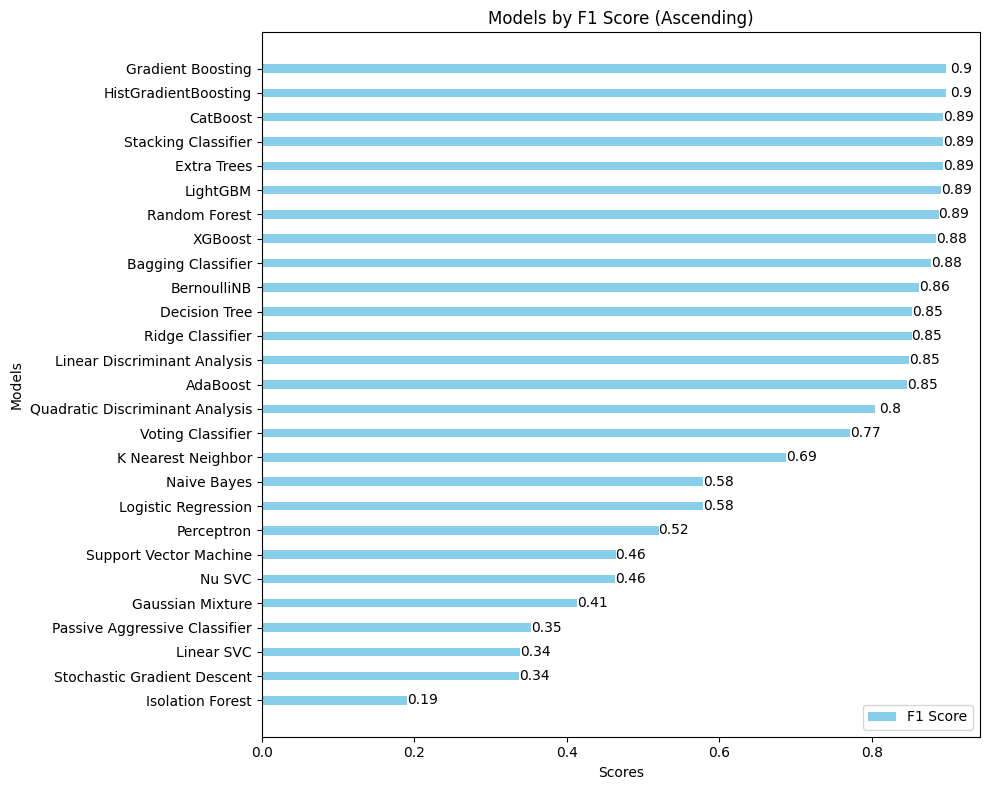

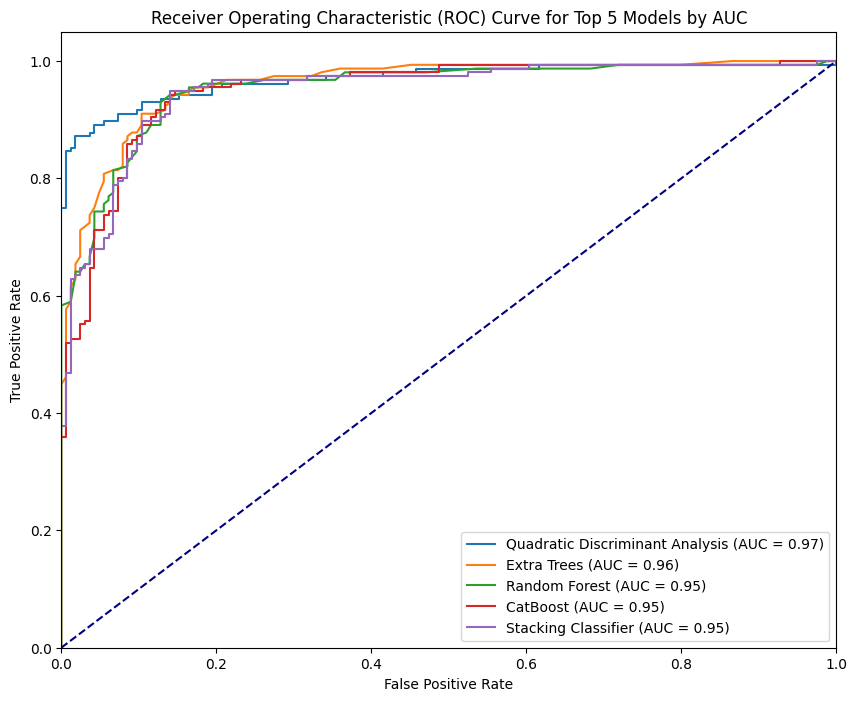

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import (
    LogisticRegression, RidgeClassifier, Perceptron, SGDClassifier, PassiveAggressiveClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier, HistGradientBoostingClassifier,
    StackingClassifier, VotingClassifier
)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_curve, auc, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.mixture import GaussianMixture

# Assuming predictors and response are already defined
predictors_train, predictors_test, response_train, response_test = train_test_split(predictors, response, test_size=0.3, random_state=42)

model_classes = {
    "Logistic Regression": LogisticRegression(),
    "K Nearest Neighbor": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Support Vector Machine": SVC(probability=True),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "Naive Bayes": GaussianNB(),
    "Perceptron": Perceptron(),
    "Ridge Classifier": RidgeClassifier(),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(),
    "Stochastic Gradient Descent": SGDClassifier(),
    "Passive Aggressive Classifier": PassiveAggressiveClassifier(),
    "Bagging Classifier": BaggingClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "Linear SVC": LinearSVC(),
    "Nu SVC": NuSVC(),
    "MultinomialNB": MultinomialNB(),
    "BernoulliNB": BernoulliNB(),
    "ComplementNB": ComplementNB(),
    "Stacking Classifier": StackingClassifier(estimators=[
        ('rf', RandomForestClassifier()),
        ('gb', GradientBoostingClassifier())
    ], final_estimator=LogisticRegression()),
    "Voting Classifier": VotingClassifier(estimators=[
        ('lr', LogisticRegression()),
        ('rf', RandomForestClassifier()),
        ('gnb', GaussianNB())
    ], voting='soft'),
    "Isolation Forest": IsolationForest(),
    "Gaussian Mixture": GaussianMixture(n_components=2)
}

model_scores = []
roc_auc_scores = []

for model_name, model in model_classes.items():
    # Handle MultinomialNB and ComplementNB specifically
    if model_name in ["MultinomialNB", "ComplementNB"]:
        # Check if predictors_train has negative values
        if (predictors_train < 0).any().any():
            print(f"Skipping {model_name} due to negative values in predictors_train.")
            continue  # Skip to the next model

    model.fit(predictors_train, response_train)
    predictions_test = model.predict(predictors_test)

    # Set average='macro' for multiclass classification
    precision = precision_score(response_test, predictions_test, average='macro')
    recall = recall_score(response_test, predictions_test, average='macro')
    f1 = f1_score(response_test, predictions_test, average='macro')

    model_scores.append({
        'model': model_name,
        'f1_score': f1
    })

    print("*****************************************")
    print(f"Results for {model_name} on testing data:")
    print("*****************************************")
    print("Precision = " + str(precision))
    print("Recall = " + str(recall))
    print("F1 Score = " + str(f1))

    if hasattr(model, "predict_proba"):  # Check if the model has predict_proba
        probas = model.predict_proba(predictors_test)[:, 1]
        fpr, tpr, _ = roc_curve(response_test, probas, pos_label=1)
        roc_auc = auc(fpr, tpr)
        roc_auc_scores.append((model_name, fpr, tpr, roc_auc))
        print("AUC value = " + str(roc_auc))
    elif hasattr(model, "decision_function"):  # For models like SVM without predict_proba
        probas = model.decision_function(predictors_test)
        fpr, tpr, _ = roc_curve(response_test, probas, pos_label=1)
        roc_auc = auc(fpr, tpr)
        roc_auc_scores.append((model_name, fpr, tpr, roc_auc))
        print("AUC value = " + str(roc_auc))
    else:
        print("AUC value cannot be calculated for this model.")  # Inform the user
    print()

# Sort the models by F1 score in ascending order
model_scores_sorted = sorted(model_scores, key=lambda x: x['f1_score'])

# Create horizontal bar graph for F1 Score for all models
fig, ax = plt.subplots(figsize=(10, 8))

bar_width = 0.35
index = np.arange(len(model_scores_sorted))

f1_scores = [score['f1_score'] for score in model_scores_sorted]
models = [score['model'] for score in model_scores_sorted]

bars1 = ax.barh(index, f1_scores, bar_width, label='F1 Score', color='skyblue')

ax.set_xlabel('Scores')
ax.set_ylabel('Models')
ax.set_title('Models by F1 Score (Ascending)')
ax.set_yticks(index)
ax.set_yticklabels(models)
ax.legend()

# Add text annotations for F1 Score
for bar in bars1:
    width = bar.get_width()
    ax.text(width + 0.02, bar.get_y() + bar.get_height()/2, round(width, 2), ha='center', va='center')

plt.tight_layout()
plt.show()

# Sort the models by AUC score and select the top 5 for ROC curve
roc_auc_scores_sorted = sorted(roc_auc_scores, key=lambda x: x[3], reverse=True)[:5]

# Plot ROC curves for the top 5 models by AUC
plt.figure(figsize=(10, 8))

for model_name, fpr, tpr, roc_auc in roc_auc_scores_sorted:
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Top 5 Models by AUC')
plt.legend(loc="lower right")
plt.show()



In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.3 MB/s eta 0:00:00


# Receiving Operator Charecteristic

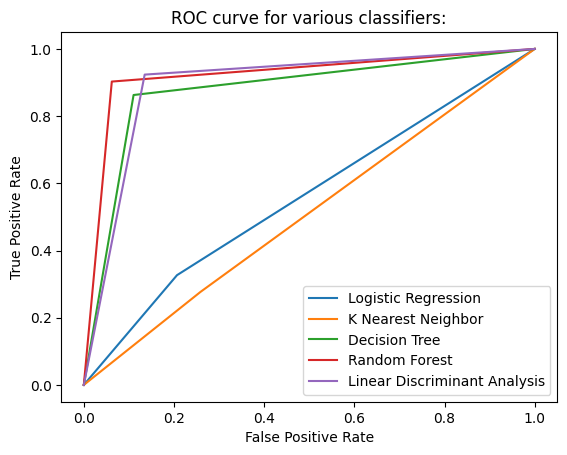

In [ ]:
plt.title("ROC curve for various classifiers:")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

for key, value in model_preds.items():
    model_list = model_preds[key]
    plt.plot(model_list[0], model_list[1], label=key)
    plt.legend()
plt.show()

- As we can see from the above ROC curves and results LDA is performing well when compared to all the classifiers.
- KNN is performing the worst out of all the classifiers.
- I was hoping to get better results with Random Forests but with this size of the data I am not surprised with this result.